# Client Project Skills Assessment

## Test 3 - Machine Learning

In [263]:
import pandas as pd
import csv
import re
import numpy as np
import random

from datetime import datetime
from numpy import int64

pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns

from collections import Counter # Keep track of our term counts
import json # For parsing json

from sqlalchemy import create_engine, text
from datetime import datetime

import datetime as dt

import xgboost as xgb

import configparser

In [269]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPClassifier
from lime.lime_tabular import LimeTabularExplainer


import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

%matplotlib inline

In [47]:
df = pd.read_csv('test3_data.csv')

In [58]:
df.head(3)

Unnamed: 0                            ID        ActionTime Action  \
0           1  AMsySZbNg8SBwPtj7IGHnip_8aY0  1508761859495365   View   
1           2  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  1502847469736117   View   
2           3  AMsySZYoK8_bD0hGv4zu0iRn1TFo  1514169431528120   View   

    Website BannerSize     Brand  colour  InteractionTime  \
0  Facebook    300x600  Carter's    Pink             0.17   
1  Facebook    300x250  Burberry     Red             4.30   
2  Facebook     728x90    Disney  Yellow             0.87   

                        Date  Date_year  Date_month  Date_day  Date_hour  \
0 2017-10-23 12:30:59.495365       2017          10        23         12   
1 2017-08-16 01:37:49.736117       2017           8        16          1   
2 2017-12-25 02:37:11.528120       2017          12        25          2   

   Date_Min  Date_Second  
0        30           59  
1        37           49  
2        37           11

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1000000 non-null  int64  
 1   ID               1000000 non-null  object 
 2   ActionTime       1000000 non-null  int64  
 3   Action           1000000 non-null  object 
 4   Website          1000000 non-null  object 
 5   BannerSize       1000000 non-null  object 
 6   Brand            1000000 non-null  object 
 7   colour           1000000 non-null  object 
 8   InteractionTime  999992 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 68.7+ MB


In [5]:
df.describe()

Unnamed: 0          ActionTime  InteractionTime
count  1000000.00          1000000.00        999992.00
mean    500000.50 1508366740249743.25             1.00
std     288675.28    4362784481652.17             1.00
min          1.00 1500990820324121.00             0.00
25%     250000.75 1505163889054374.75             0.29
50%     500000.50 1507718154498194.50             0.69
75%     750000.25 1511500265328571.00             1.38
max    1000000.00 1517357521460968.00            13.39

In [6]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0                            ID        ActionTime Action  \
0                1  AMsySZbNg8SBwPtj7IGHnip_8aY0  1508761859495365   View   
1                2  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  1502847469736117   View   
2                3  AMsySZYoK8_bD0hGv4zu0iRn1TFo  1514169431528120   View   
3                4  AMsySZahxpwLOWnMJj6RGATgwEOc  1515527952591896   View   
4                5  AMsySZbqgfMBDtAqZz1jVRaOmX00  1507514809374045   View   
...            ...                           ...               ...    ...   
999995      999996  AMsySZY-9Mzh_xjk57_PBNO_8QRO  1508108130372165   View   
999996      999997  AMsySZY-KoDAx1qJv15SZ9lKO2QF  1516760241253562   View   
999997      999998  AMsySZZGRYHeXVjPP2Rr6F-kjFc3  1502841951670170   View   
999998      999999  AMsySZaSAhXiCSGhaCLWcoLse-0i  1517068511614322   View   
999999     1000000  AMsySZYRh7zkkDPtcrGdXEbM_M0f  1505855363538153   View   

              Website BannerSize     Bran

### ActionTime
We can notice ActionTime is in the format of microsecond format. It will be converted to the datetime and extract year, month, day, hour, min from datetime.

In [7]:
df['ActionTime']

0         1508761859495365
1         1502847469736117
2         1514169431528120
3         1515527952591896
4         1507514809374045
                ...       
999995    1508108130372165
999996    1516760241253562
999997    1502841951670170
999998    1517068511614322
999999    1505855363538153
Name: ActionTime, Length: 1000000, dtype: int64

In [48]:
 df['Date'] = pd.to_datetime(df['ActionTime'], unit='us')

In [63]:
#pd.to_datetime(df['ActionTime'], unit='us').reset_index()['ActionTime']

In [49]:
 df['Date']

0        2017-10-23 12:30:59.495365
1        2017-08-16 01:37:49.736117
2        2017-12-25 02:37:11.528120
3        2018-01-09 19:59:12.591896
4        2017-10-09 02:06:49.374045
                    ...            
999995   2017-10-15 22:55:30.372165
999996   2018-01-24 02:17:21.253562
999997   2017-08-16 00:05:51.670170
999998   2018-01-27 15:55:11.614322
999999   2017-09-19 21:09:23.538153
Name: Date, Length: 1000000, dtype: datetime64[ns]

In [50]:
df['Date_YMD'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [51]:
df['Date_YMD'] = pd.to_datetime(df["Date_YMD"]) 

In [52]:
df['Date_YM'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

In [53]:
df['Date_YM'] = pd.to_datetime(df["Date_YM"]) 

In [54]:
df['Date_year'] = df['Date'].dt.strftime('%Y').astype(int64)

In [55]:
df['Date_month'] = df['Date'].dt.strftime('%m').astype(int64)

In [56]:
df['Date_day'] = df['Date'].dt.strftime('%d').astype(int64)

In [57]:
df['Date_hour'] = df['Date'].dt.strftime('%H').astype(int64)

In [58]:
df['Date_Min'] = df['Date'].dt.strftime('%M').astype(int64)

In [59]:
df['Date_Second'] = df['Date'].dt.strftime('%S').astype(int64)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1000000 non-null  int64         
 1   ID               1000000 non-null  object        
 2   ActionTime       1000000 non-null  int64         
 3   Action           1000000 non-null  object        
 4   Website          1000000 non-null  object        
 5   BannerSize       1000000 non-null  object        
 6   Brand            1000000 non-null  object        
 7   colour           1000000 non-null  object        
 8   InteractionTime  999992 non-null   float64       
 9   Date             1000000 non-null  datetime64[ns]
 10  Date_YMD         1000000 non-null  datetime64[ns]
 11  Date_YM          1000000 non-null  datetime64[ns]
 12  Date_year        1000000 non-null  int64         
 13  Date_month       1000000 non-null  int64         
 14  Dat

In [32]:
#numeric features
df.describe()

Unnamed: 0          ActionTime  InteractionTime  \
count  1000000.00          1000000.00        999992.00   
mean    500000.50 1508366740249743.25             1.00   
min          1.00 1500990820324121.00             0.00   
25%     250000.75 1505163889054374.75             0.29   
50%     500000.50 1507718154498194.50             0.69   
75%     750000.25 1511500265328571.00             1.38   
max    1000000.00 1517357521460968.00            13.39   
std     288675.28    4362784481652.17             1.00   

                                Date                       Date_YMD  \
count                        1000000                        1000000   
mean   2017-10-18 22:45:40.249742080  2017-10-18 09:49:38.553600256   
min       2017-07-25 13:53:40.324121            2017-07-25 00:00:00   
25%    2017-09-11 21:04:49.054374656            2017-09-11 00:00:00   
50%    2017-10-11 10:35:54.498194432            2017-10-11 00:00:00   
75%    2017-11-24 05:11:05.328570880            2017-11-24 00:00:00   
max       2018-01-31 00:12:01.460968            2018-01-31 00:00:00   
std                              NaN                            NaN   

                             Date_YM  Date_year  Date_month   Date_day  \
count                        1000000 1000000.00  1000000.00 1000000.00   
mean   2017-10-02 21:16:45.523199232    2017.13        8.48      16.52   
min              2017-07-01 00:00:00    2017.00        1.00       1.00   
25%              2017-09-01 00:00:00    2017.00        8.00       9.00   
50%              2017-10-01 00:00:00    2017.00        9.00      17.00   
75%              2017-11-01 00:00:00    2017.00       10.00      24.00   
max              2018-01-01 00:00:00    2018.00       12.00      31.00   
std                              NaN       0.34        3.15       8.87   

       Date_hour   Date_Min  Date_Second  
count 1000000.00 1000000.00   1000000.00  
mean       12.44      29.23        29.38  
min         0.00       0.00         0.00  
25%         5.00      14.00        14.00  
50%        14.00      29.00        29.00  
75%        19.00      44.00        44.00  
max        23.00      59.00        59.00  
std         7.47      17.46        17.38

In [33]:
# categorical features
df.describe(include='O')

ID   Action   Website BannerSize     Brand  \
count                        1000000  1000000   1000000    1000000   1000000   
unique                        218686        2        16         15        10   
top     AMsySZaSHnOuwfEjIHSMTU237tQS     View  Facebook    300x250  Carter's   
freq                            2231   999756    600137     408705    222635   

         colour  
count   1000000  
unique        7  
top        Pink  
freq     322837

In [115]:
# more extensive look at the data 

from pandas_profiling import ProfileReport


profile = ProfileReport(df, title='A mega-online shopping mall', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Results
According to the ProfileReport:

- Dataset statistics

    Number of variables	18
    Number of observations	1000000
    Missing cells	8
    Missing cells (%)	< 0.1%
    Duplicate rows	0
    Duplicate rows (%)	0.0%
    Total size in memory	474.0 MiB
    Average record size in memory	497.1 B
    
- Action Variable
    view = 999756
    click = 244
    
- Website Variable
    Categorical
    Distinct	16
    Distinct (%)	< 0.1%
    Missing	0
    Missing (%)	0.0%
    Memory size	61.9 MiB
    Facebook	600137 
    Other	97616 
    Atedra	61637 
    instagram.com	 56068
    Craigslist.ca	 39674
    Other values (11)	144868 
    
- BannerSize Variable
    Categorical
    Distinct	15
    Distinct (%)	< 0.1%
    Missing	0
    Missing (%)	0.0%
    Memory size	60.5 MiB
    300x250	408705 
    728x90	196219 
    Other	162161 
    320x50	62163 
    300x600	59280 
    Other values (10)	111472 
    
- Brand Variable
    Categorical
    Distinct	10
    Distinct (%)	< 0.1%
    Missing	0
    Missing (%)	0.0%
    Memory size	62.4 MiB
    Carter's	222635 
    JoeFresh	191722 
    Old Navy	150583 
    Banana Republic	84111 
    Burberry	83346 
    Other values (5)	267603 
    
- colour Variable
    Categorical
    Distinct	7
    Distinct (%)	< 0.1%
    Missing	0
    Missing (%)	0.0%
    Memory size	58.5 MiB
    Pink	322837 
    Yellow	184132 
    Gold	161327 
    Blue	137856 
    Red	92381 
    Other values (2)	101467 
 
- InteractionTime Variable
    Missing	8
    
- Date_year Variable
    Categorical
    HIGH CORRELATION 

    Distinct	2
    Distinct (%)	< 0.1%
    Missing	0
    Missing (%)	0.0%
    Memory size	58.2 MiB
    2017	868917 
    2018	131083 

In [60]:
# we'll use regular expression against the entire dataframe to capture any other empty value
df.replace(r'^\s*$',np.nan, regex=True).isnull().sum()

Unnamed: 0         0
ID                 0
ActionTime         0
Action             0
Website            0
BannerSize         0
Brand              0
colour             0
InteractionTime    8
Date               0
Date_YMD           0
Date_YM            0
Date_year          0
Date_month         0
Date_day           0
Date_hour          0
Date_Min           0
Date_Second        0
dtype: int64

In [62]:
df.isnull().sum()

Unnamed: 0         0
ID                 0
ActionTime         0
Action             0
Website            0
BannerSize         0
Brand              0
colour             0
InteractionTime    8
Date               0
Date_YMD           0
Date_YM            0
Date_year          0
Date_month         0
Date_day           0
Date_hour          0
Date_Min           0
Date_Second        0
dtype: int64

### Note:
There is only 8 missing value "NAN" from InteractionTime feature. Will replace them by zero value

In [63]:
df['InteractionTime'] = df['InteractionTime'].replace(np.nan, 0)

In [64]:
df.isnull().sum()

Unnamed: 0         0
ID                 0
ActionTime         0
Action             0
Website            0
BannerSize         0
Brand              0
colour             0
InteractionTime    0
Date               0
Date_YMD           0
Date_YM            0
Date_year          0
Date_month         0
Date_day           0
Date_hour          0
Date_Min           0
Date_Second        0
dtype: int64

In [67]:
df1 = pd.get_dummies(df, columns=['Action'],  dtype=int)

In [69]:
#df1

### Label Click

In [75]:
# it's imbalanced, so we'll need to address that
df1['Action_Click'].value_counts()

Action_Click
0    999756
1       244
Name: count, dtype: int64

### Action_View

In [71]:
df1['Action_View'].value_counts()

Action_View
1    999756
0       244
Name: count, dtype: int64

## CTR rate

In [72]:
ctr = df1['Action_Click'].value_counts()[1] / df1['Action_View'].value_counts()[1]
print('CTR rate = ', ctr*100)

CTR rate =  0.02440595505303294


Note:
It is very small ctr rate

## Related Label Click with other Features

### 1. Group of 'Website', 'Action_View', 'Action_Click'

#### Notes:
- I want to find which website is popular for the consumers. I grouped over website and action_view and count over action_click. The zero value in action_view column means that is click action and the one vlue means no click and only view.
- After that I created pivot value to polt.
- The first histogram Webclick_grp_pivot[0].plot.bar() shows only click.
- You could notice the populat website and which got the highest click is the facebook.
- The second histogram for both, but because the click values are very few comparing to the number of views.
- It is also the facebook is the most view values.

In [84]:
Webclick = df1[['Website', 'Action_View', 'Action_Click']]
Webclick_grp = Webclick.groupby(['Website', 'Action_View']).count()
Webclick_grp.head(50)

Action_Click
Website       Action_View              
AOL           1                     560
Amazon        0                       6
              1                   20595
Atedra        0                       2
              1                   61635
Craigslist.ca 0                       1
              1                   39673
Expedia       0                       6
              1                    6986
Facebook      0                     165
              1                  599972
Kijiji        0                       7
              1                    7719
Other         0                      32
              1                   97584
Sympatico     0                       1
              1                   11352
TubeMogul     0                       9
              1                   28542
Twitter       1                   21086
Wayfair       0                       1
              1                    4001
Weather       1                    5116
Yahoo         0                       6
              1                   33725
Youtube       1                    5150
instagram.com 0                       8
              1                   56060

#### Pivot table

In [91]:
Webclick_grp_pivot = pd.pivot_table(Webclick_grp, values='Action_Click', index=["Website"],
                       columns=["Action_View"], aggfunc=np.sum).fillna(0)
Webclick_grp_pivot 

Action_View        0         1
Website                       
AOL             0.00    560.00
Amazon          6.00  20595.00
Atedra          2.00  61635.00
Craigslist.ca   1.00  39673.00
Expedia         6.00   6986.00
Facebook      165.00 599972.00
Kijiji          7.00   7719.00
Other          32.00  97584.00
Sympatico       1.00  11352.00
TubeMogul       9.00  28542.00
Twitter         0.00  21086.00
Wayfair         1.00   4001.00
Weather         0.00   5116.00
Yahoo           6.00  33725.00
Youtube         0.00   5150.00
instagram.com   8.00  56060.00

<Axes: xlabel='Website'>

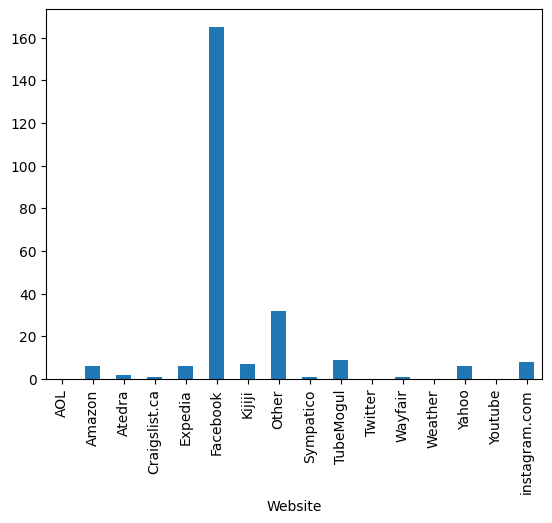

In [98]:
Webclick_grp_pivot[0].plot.bar()

<Axes: xlabel='Website'>

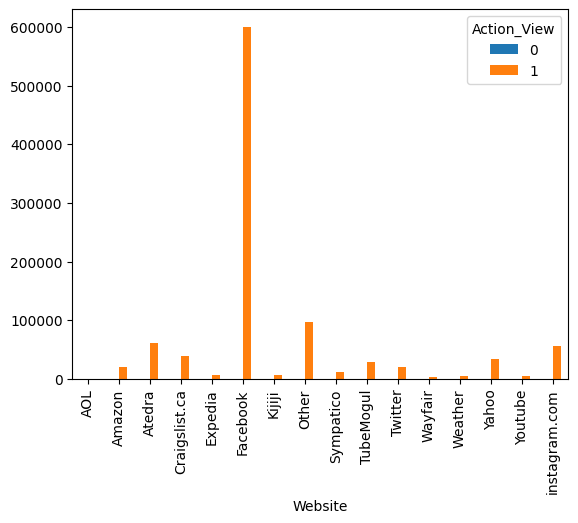

In [99]:
Webclick_grp_pivot.plot.bar()

### 2. Group of 'Brand', 'Action_View', 'Action_Click'

#### Notes:
- I did as the previous, but this time I grouped over Brand instead of website.
- The attractive Brands are: 
    1. Carter's
    2. JoeFresh
    3. Old Navy

In [102]:
Brandclick = df1[['Brand', 'Action_View', 'Action_Click']]
Brandclick_grp = Brandclick.groupby(['Brand', 'Action_View']).count()
Brandclick_grp.head(50)

Action_Click
Brand                Action_View              
Banana Republic      0                      12
                     1                   84099
Burberry             0                      21
                     1                   83325
Carter's             0                      59
                     1                  222576
Disney               0                      13
                     1                   83192
Gap                  0                      11
                     1                   30685
JoeFresh             0                      42
                     1                  191680
Old Navy             0                      39
                     1                  150544
The Children's Place 0                       8
                     1                   27981
Zara                 0                      16
                     1                   55563
gymboree             0                      23
                     1                   70111

In [103]:
Brandclick_grp_pivot = pd.pivot_table(Brandclick_grp, values='Action_Click', index=["Brand"],
                       columns=["Action_View"], aggfunc=np.sum).fillna(0)
Brandclick_grp_pivot 

Action_View            0       1
Brand                           
Banana Republic       12   84099
Burberry              21   83325
Carter's              59  222576
Disney                13   83192
Gap                   11   30685
JoeFresh              42  191680
Old Navy              39  150544
The Children's Place   8   27981
Zara                  16   55563
gymboree              23   70111

<Axes: xlabel='Brand'>

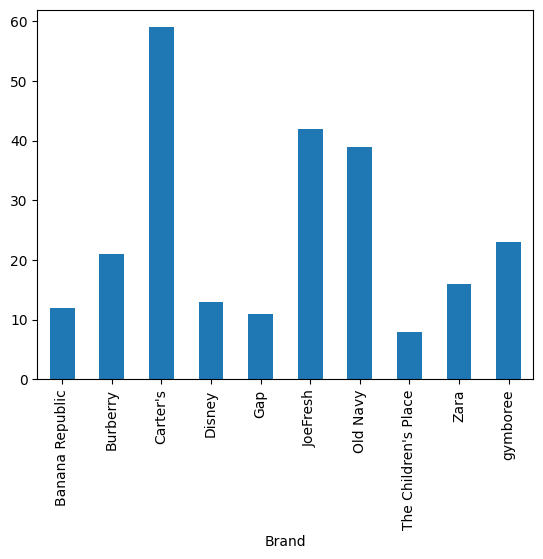

In [104]:
Brandclick_grp_pivot[0].plot.bar()

<Axes: xlabel='Brand'>

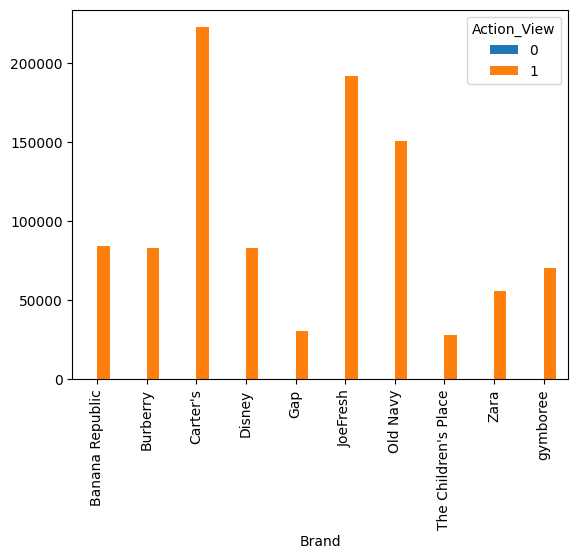

In [105]:
Brandclick_grp_pivot.plot.bar()

### 3. Group of 'Colour', 'Action_View', 'Action_Click'

#### Notes:
- I did as the previous, but this time I grouped over Colour.
- The favorite colours are: 
    1. Pink
    2. Yellow
    3. Gold

In [107]:
Colourclick = df1[['colour', 'Action_View', 'Action_Click']]
Colourclick_grp = Colourclick.groupby(['colour', 'Action_View']).count()
Colourclick_grp.head(50)

Action_Click
colour Action_View              
Blue   0                      32
       1                  137824
Gold   0                      40
       1                  161287
Pink   0                      79
       1                  322758
Red    0                      22
       1                   92359
White  0                      10
       1                   55459
Yellow 0                      48
       1                  184084
other  0                      13
       1                   45985

In [108]:
Colourclick_grp_pivot = pd.pivot_table(Colourclick_grp, values='Action_Click', index=["colour"],
                       columns=["Action_View"], aggfunc=np.sum).fillna(0)
Colourclick_grp_pivot 

Action_View   0       1
colour                 
Blue         32  137824
Gold         40  161287
Pink         79  322758
Red          22   92359
White        10   55459
Yellow       48  184084
other        13   45985

<Axes: xlabel='colour'>

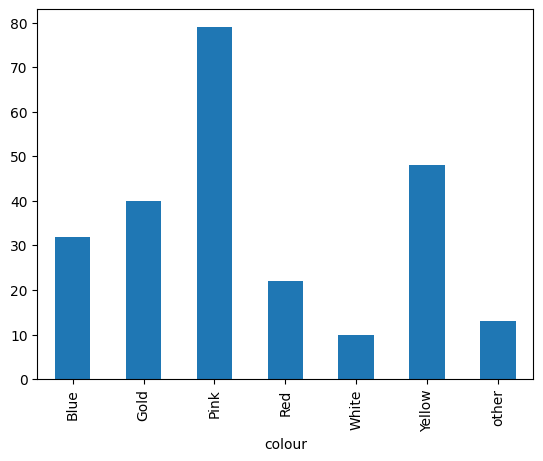

In [109]:
Colourclick_grp_pivot[0].plot.bar()

<Axes: xlabel='colour'>

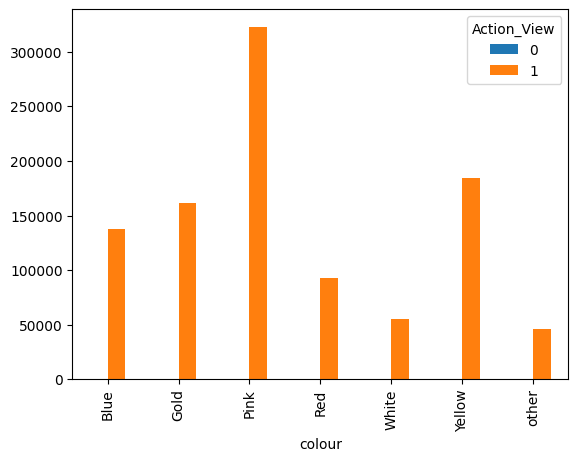

In [110]:
Colourclick_grp_pivot.plot.bar()

### 4. Group of 'BannerSize', 'Action_View', 'Action_Click'

#### Notes:
- I did as the previous, but this time I grouped over BannerSize.
- The favorite BannerSizes are: 
    1. 300x250
    2. 728x90
    3. 160x600

In [111]:
BannerSizeclick = df1[['BannerSize', 'Action_View', 'Action_Click']]
BannerSizeclick_grp = BannerSizeclick.groupby(['BannerSize', 'Action_View']).count()
BannerSizeclick_grp.head(50)

Action_Click
BannerSize Action_View              
1200x627   0                       5
           1                   32901
1536x2048  1                     319
160x600    0                      36
           1                   57522
1x1        0                      16
           1                    8641
300x250    0                      80
           1                  408625
300x50     0                       4
           1                    1818
300x600    0                      11
           1                   59269
320x100    1                    1272
320x480    1                    7114
320x50     0                      12
           1                   62151
728x90     0                      48
           1                  196171
750x125    0                       1
           1                     571
768x1024   1                    1167
Other      0                      31
           1                  162130
other      1                      85

In [112]:
BannerSizeclick_grp_pivot = pd.pivot_table(BannerSizeclick_grp, values='Action_Click', index=["BannerSize"],
                       columns=["Action_View"], aggfunc=np.sum).fillna(0)
BannerSizeclick_grp_pivot 

Action_View     0         1
BannerSize                 
1200x627     5.00  32901.00
1536x2048    0.00    319.00
160x600     36.00  57522.00
1x1         16.00   8641.00
300x250     80.00 408625.00
300x50       4.00   1818.00
300x600     11.00  59269.00
320x100      0.00   1272.00
320x480      0.00   7114.00
320x50      12.00  62151.00
728x90      48.00 196171.00
750x125      1.00    571.00
768x1024     0.00   1167.00
Other       31.00 162130.00
other        0.00     85.00

<Axes: xlabel='BannerSize'>

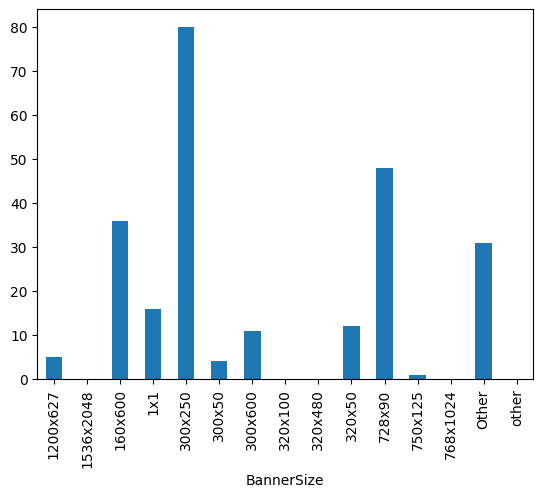

In [113]:
BannerSizeclick_grp_pivot[0].plot.bar()

<Axes: xlabel='BannerSize'>

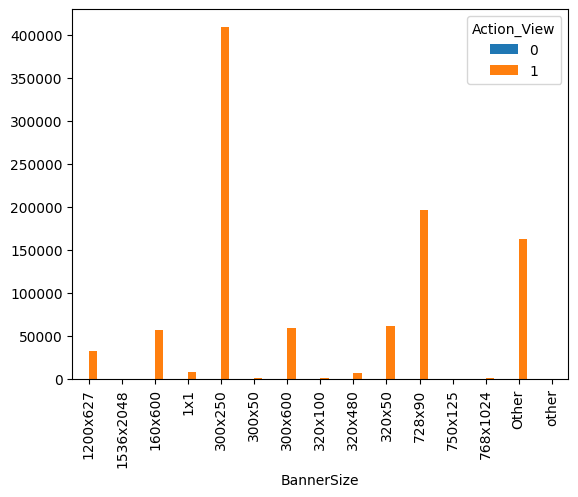

In [115]:
BannerSizeclick_grp_pivot.plot.bar()

### 5. Group of 'InteractionTime', 'Brand'

#### Notes:
- I did as the previous, but this time I grouped over InteractionTime and Brand.
- The consumers spend more InteractionTime according to their favorite Branda which are: 
    1. Carter's	  222527.27
    2. JoeFresh	  191732.25
    3. Old Navy	  150288.44

In [136]:
IActTm_Brndclck = df1[['InteractionTime', 'Brand']]
IActTm_Brndclck_grp = IActTm_Brndclck.groupby(['Brand']).sum()
IActTm_Brndclck_grp.head(50)

InteractionTime
Brand                                
Banana Republic              83611.78
Burberry                     83099.17
Carter's                    222527.27
Disney                       83003.74
Gap                          30871.03
JoeFresh                    191732.25
Old Navy                    150288.44
The Children's Place         27739.65
Zara                         55556.02
gymboree                     70230.03

<Axes: xlabel='Brand'>

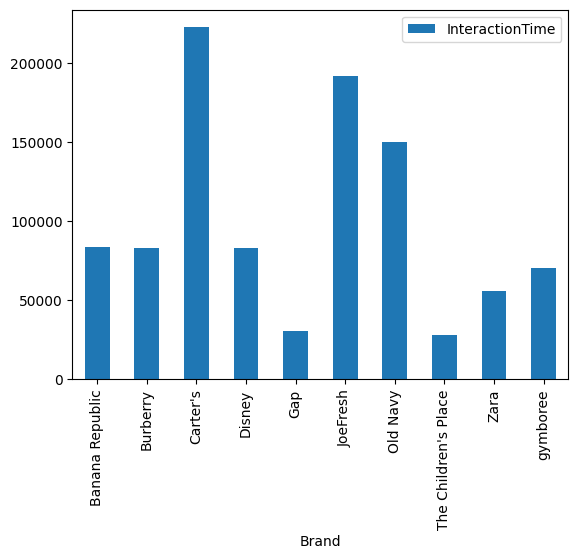

In [137]:
IActTm_Brndclck_grp.plot.bar()

### 6. Group of 'InteractionTime', 'Website'

#### Notes:
- I did as the previous, but this time I grouped over InteractionTime and Website.
- The consumers spend more InteractionTime according to their favorite Website which are: 
    1. Facebook	599331.78
    2. Other	97058.76
    3. Atedra	61496.73

In [153]:
IActTm_Webclck = df1[['InteractionTime', 'Website']]
IActTm_Webclck_grp = IActTm_Webclck.groupby(['Website']).sum()
IActTm_Webclck_grp.head(50)

InteractionTime
Website                       
AOL                     598.97
Amazon                20491.68
Atedra                61496.73
Craigslist.ca         39704.57
Expedia                6918.98
Facebook             599331.78
Kijiji                 7638.20
Other                 97058.76
Sympatico             11313.86
TubeMogul             28357.04
Twitter               21098.43
Wayfair                3986.08
Weather                5145.25
Yahoo                 33779.95
Youtube                5207.07
instagram.com         56532.03

<Axes: xlabel='Website'>

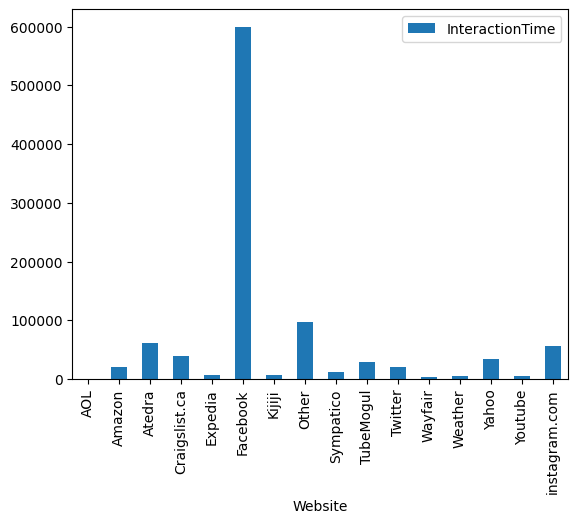

In [154]:
IActTm_Webclck_grp.plot.bar()

### 7. Group of 'InteractionTime', 'Brand', 'Website'

#### Notes:
- I did as the previous, but this time I grouped over InteractionTime, Brand and Website.
- I created a table shows the time that costomers spend for every websites v Brands.

In [142]:
IActTm_WebBrndclck = df1[['InteractionTime', 'Website', 'Brand']]
IActTm_WebBrndclck_grp = IActTm_WebBrndclck.groupby(['Website', 'Brand',]).sum()
IActTm_WebBrndclck_grp.tail(20)

InteractionTime
Website       Brand                                
Youtube       Banana Republic                439.16
              Burberry                       452.01
              Carter's                      1166.13
              Disney                         444.42
              Gap                            181.97
              JoeFresh                       991.79
              Old Navy                       740.33
              The Children's Place           155.57
              Zara                           268.91
              gymboree                       366.78
instagram.com Banana Republic               4770.43
              Burberry                      4770.67
              Carter's                     12310.69
              Disney                        4704.58
              Gap                           1739.91
              JoeFresh                     10982.48
              Old Navy                      8681.62
              The Children's Place          1567.23
              Zara                          3111.54
              gymboree                      3892.90

In [139]:
IActTm_WebBrndclck_grp_pivot = pd.pivot_table(IActTm_WebBrndclck_grp, values='InteractionTime', index=["Website"],
                       columns=["Brand"], aggfunc=np.sum).fillna(0)
IActTm_WebBrndclck_grp_pivot

Brand          Banana Republic  Burberry  Carter's   Disney      Gap  \
Website                                                                
AOL                      44.54     45.57    164.22    50.49    16.72   
Amazon                 1675.60   1757.61   4562.45  1753.58   672.20   
Atedra                 5148.24   5129.85  13641.34  5111.56  1913.32   
Craigslist.ca          3238.03   3426.14   8815.48  3220.67  1212.43   
Expedia                 568.77    591.33   1581.60   586.90   165.30   
Facebook              50107.06  49705.27 133188.78 50115.37 18587.86   
Kijiji                  625.07    615.05   1678.15   645.08   227.31   
Other                  8153.25   7890.40  21972.96  7957.52  3090.63   
Sympatico              1006.74    952.23   2555.90   868.48   295.13   
TubeMogul              2422.44   2385.35   6373.50  2258.81   859.04   
Twitter                1824.38   1838.38   4662.01  1733.33   633.41   
Wayfair                 349.07    327.55    915.49   322.09   116.53   
Weather                 430.10    444.82   1123.16   450.94   148.53   
Yahoo                  2808.89   2766.92   7815.41  2779.91  1010.74   
Youtube                 439.16    452.01   1166.13   444.42   181.97   
instagram.com          4770.43   4770.67  12310.69  4704.58  1739.91   

Brand          JoeFresh  Old Navy  The Children's Place     Zara  gymboree  
Website                                                                     
AOL               91.42     96.89                 13.16    30.92     45.04  
Amazon          3862.34   3016.56                607.10  1138.53   1445.70  
Atedra         11873.04   9062.47               1724.75  3482.73   4409.42  
Craigslist.ca   7700.79   5858.73               1201.27  2230.48   2800.54  
Expedia         1358.78    993.47                200.00   383.51    489.33  
Facebook      115011.71  90485.89              16567.54 33469.79  42092.52  
Kijiji          1482.72   1148.42                218.20   416.60    581.59  
Other          18632.39  14556.40               2627.43  5366.78   6810.99  
Sympatico       2150.17   1763.80                311.11   632.69    777.61  
TubeMogul       5501.74   4299.16                827.68  1476.39   1952.93  
Twitter         3996.22   3151.20                560.50  1198.72   1500.28  
Wayfair          737.96    617.32                114.88   207.77    277.42  
Weather          891.87    803.92                160.43   282.80    408.67  
Yahoo           6466.84   5012.25                882.79  1857.88   2378.32  
Youtube          991.79    740.33                155.57   268.91    366.78  
instagram.com  10982.48   8681.62               1567.23  3111.54   3892.90

<Axes: xlabel='Website'>

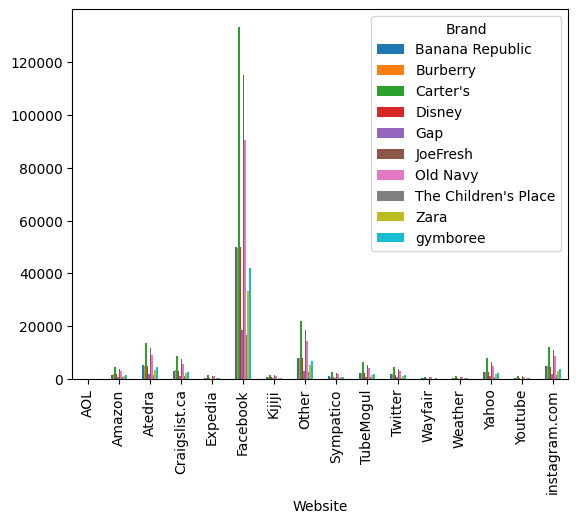

In [140]:
IActTm_WebBrndclck_grp_pivot.plot.bar()

### Note:
I need to get the name of the day to see consumers' behaviours and time 

In [150]:
df1['weekday'] = df1[['Date']].apply(lambda x: dt.datetime.strftime(x['Date'], '%A'), axis=1)
df1['weekday']

0            Monday
1         Wednesday
2            Monday
3           Tuesday
4            Monday
            ...    
999995       Sunday
999996    Wednesday
999997    Wednesday
999998     Saturday
999999      Tuesday
Name: weekday, Length: 1000000, dtype: object

### 8. Group of 'InteractionTime', 'weekday'

#### Notes:
- I did as the previous, but this time I grouped over InteractionTime and weekday.
- The consumers spend much InteractionTime according to the calculation:
    1. Tuesday	153564.61
    2. Monday	153162.99
- And minumum InteractionTime on:
    - Saturday	130677.12


In [156]:
IActTm_Dayclck = df1[['InteractionTime', 'weekday']]
IActTm_Dayclck_grp = IActTm_Dayclck.groupby(['weekday']).sum()
IActTm_Dayclck_grp.head(50)

InteractionTime
weekday                   
Friday           142787.65
Monday           153162.99
Saturday         130677.12
Sunday           133616.34
Thursday         141797.56
Tuesday          153564.61
Wednesday        143053.09

<Axes: xlabel='weekday'>

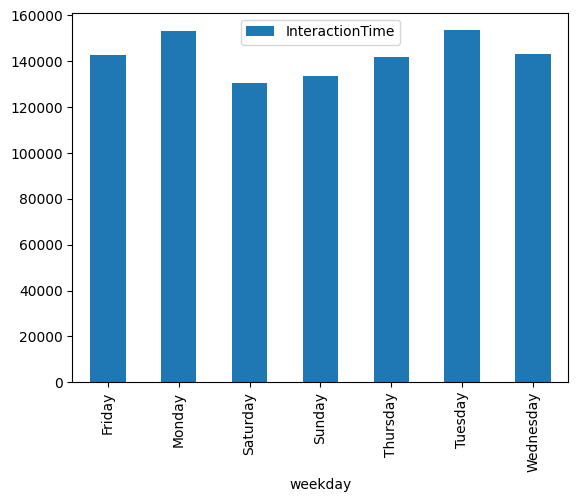

In [157]:
IActTm_Dayclck_grp.plot.bar()

### 9. Group of 'weekday', 'Action_View', 'Action_Click'

#### Notes:
- I did as the previous, but this time I grouped over I'weekday', 'Action_View', and 'Action_Click'
- The max click on Tuesday and the minumum on Sunday.


In [158]:
Weekclick = df1[['weekday', 'Action_View', 'Action_Click']]
Weekclick_grp = Weekclick.groupby(['weekday', 'Action_View']).count()
Weekclick_grp.head(50)

Action_Click
weekday   Action_View              
Friday    0                      43
          1                  142644
Monday    0                      43
          1                  153221
Saturday  0                      25
          1                  130921
Sunday    0                      13
          1                  133923
Thursday  0                      38
          1                  141729
Tuesday   0                      52
          1                  153428
Wednesday 0                      30
          1                  143890

In [159]:
Weekclick_grp_pivot = pd.pivot_table(Weekclick_grp, values='Action_Click', index=["weekday"],
                       columns=["Action_View"], aggfunc=np.sum).fillna(0)
Weekclick_grp_pivot

Action_View   0       1
weekday                
Friday       43  142644
Monday       43  153221
Saturday     25  130921
Sunday       13  133923
Thursday     38  141729
Tuesday      52  153428
Wednesday    30  143890

<Axes: xlabel='weekday'>

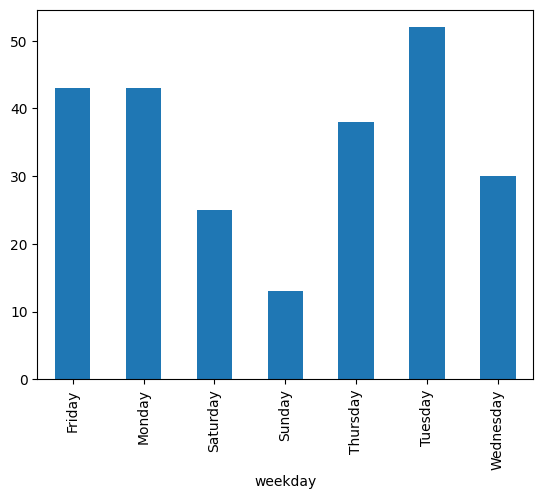

In [160]:
Weekclick_grp_pivot[0].plot.bar()

<Axes: xlabel='weekday'>

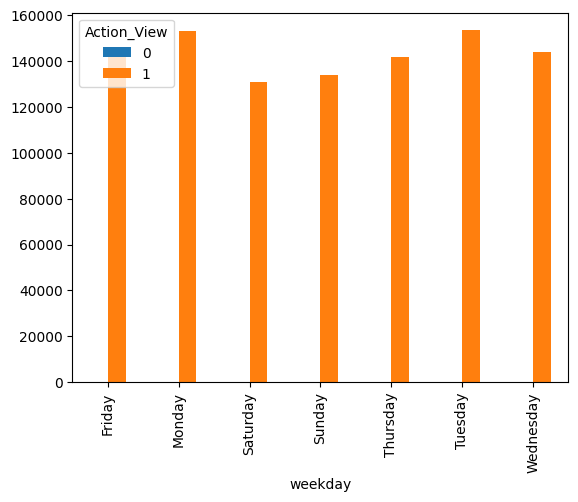

In [161]:
Weekclick_grp_pivot.plot.bar()

## TIME SERIES ANALYSIS for Action_Click

It’s good practice to perform a few checks on the data. For instance, is the data really sampled every hour? Are there any gaps? We can check this:

In [163]:
df1.head(3)

Unnamed: 0                            ID        ActionTime   Website  \
0           1  AMsySZbNg8SBwPtj7IGHnip_8aY0  1508761859495365  Facebook   
1           2  AMsySZZcUFNGOJs-lfC9j-ZDlV7Z  1502847469736117  Facebook   
2           3  AMsySZYoK8_bD0hGv4zu0iRn1TFo  1514169431528120  Facebook   

  BannerSize     Brand  colour  InteractionTime                       Date  \
0    300x600  Carter's    Pink             0.17 2017-10-23 12:30:59.495365   
1    300x250  Burberry     Red             4.30 2017-08-16 01:37:49.736117   
2     728x90    Disney  Yellow             0.87 2017-12-25 02:37:11.528120   

    Date_YMD    Date_YM  Date_year  Date_month  Date_day  Date_hour  Date_Min  \
0 2017-10-23 2017-10-01       2017          10        23         12        30   
1 2017-08-16 2017-08-01       2017           8        16          1        37   
2 2017-12-25 2017-12-01       2017          12        25          2        37   

   Date_Second  Action_Click  Action_View    weekday  
0           59             0            1     Monday  
1           49             0            1  Wednesday  
2           11             0            1     Monday

What is the start and end date of the time series data set we are working with?

In [177]:
df1["Date"].min(), df1["Date"].max()

(Timestamp('2017-07-25 13:53:40.324121'),
 Timestamp('2018-01-31 00:12:01.460968'))

Using pandas.Timestamp for datetimes enables us to calculate with date information and make them comparable. Hence, we can use this to get the length of our time series:

In [178]:
df1["Date"].max() - df1["Date"].min()

Timedelta('189 days 10:18:21.136847')

The result is a pandas.Timedelta object, similar to datetime.timedelta from the standard Python library and defining a time duration.

What are the count and sum of the click for all days ?

Text(0.5, 0, 'Action_Click by All Days')

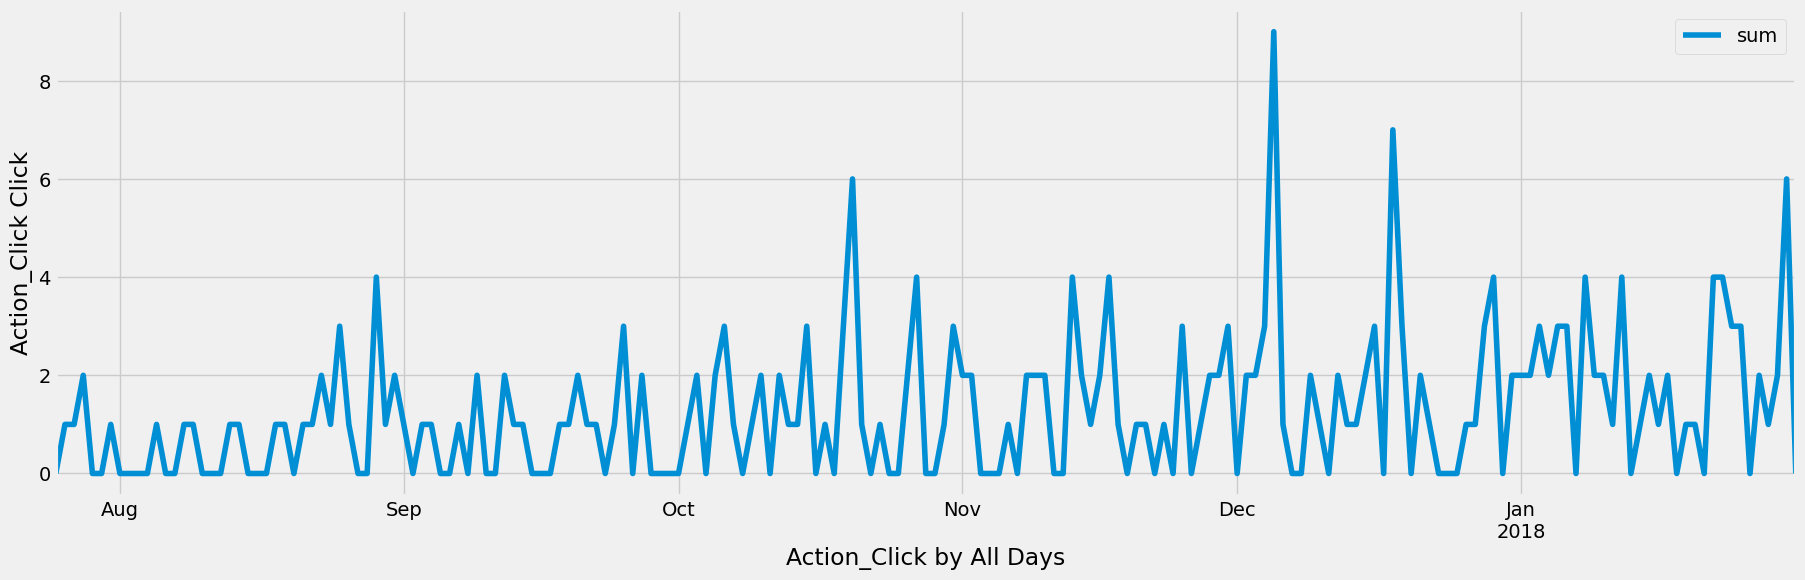

In [240]:
df1.groupby('Date_YMD')['Action_Click'].agg(['sum']).plot(figsize=(20,6))
plt.ylabel('Action_Click Click')
plt.xlabel('Action_Click by All Days')

Text(0.5, 0, 'Action_Click by Days')

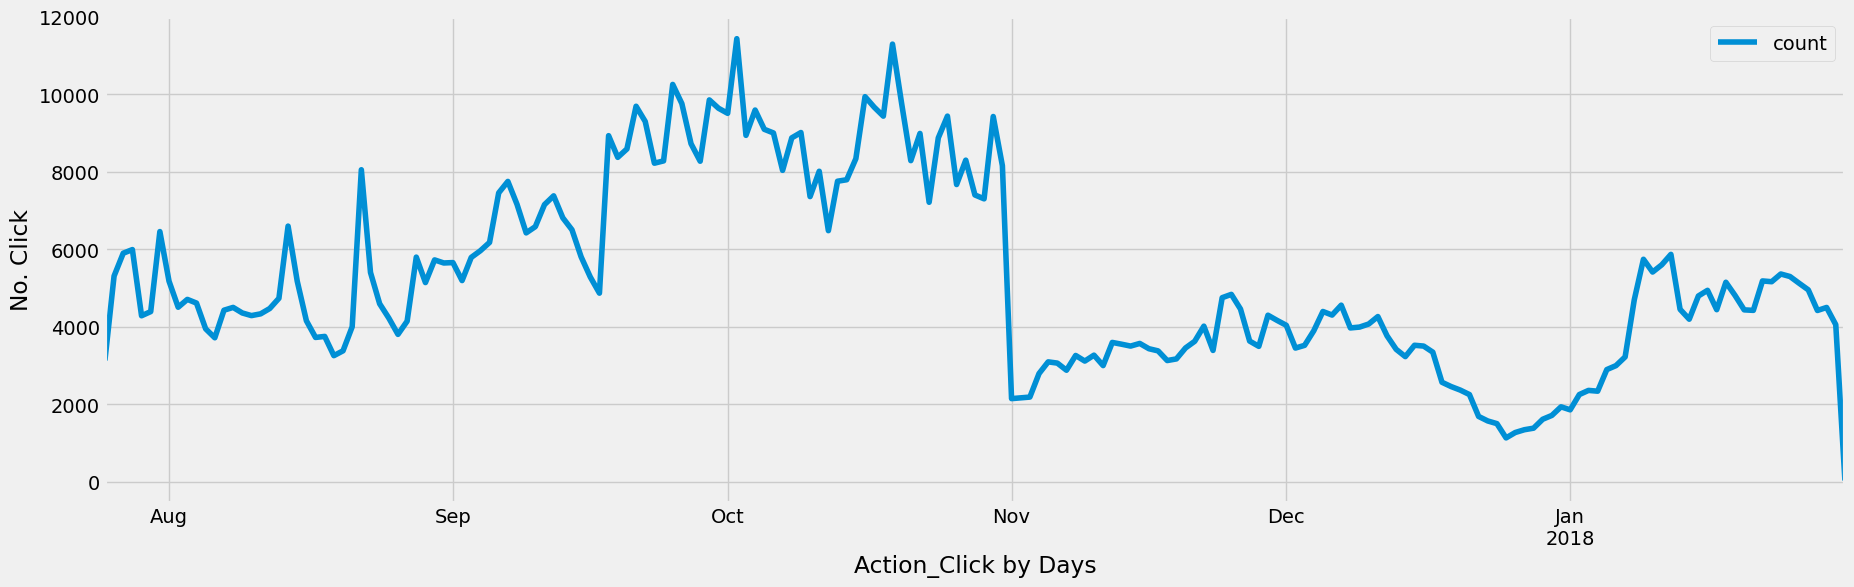

In [241]:
df1.groupby('Date_YMD')['Action_Click'].agg(['count']).plot(figsize=(20,6))
plt.ylabel('No. Click')
plt.xlabel('Action_Click by Days')

## TIME SERIES ANALYSIS for InteractionTime

Text(0.5, 0, 'InteractionTime per Hours')

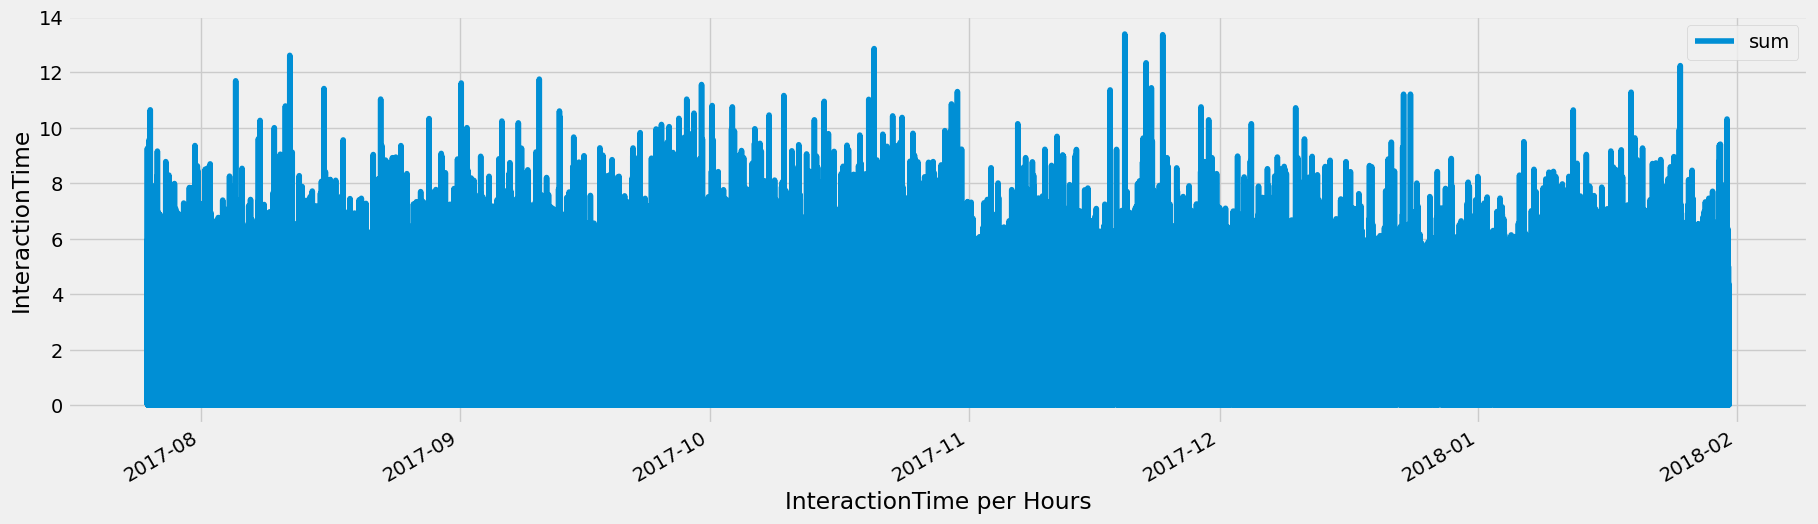

In [242]:
df1.groupby('Date')['InteractionTime'].agg(['sum']).plot(figsize=(20,6))
plt.ylabel('InteractionTime')
plt.xlabel('InteractionTime per Hours')

## CTR RATE - Click Trends by Hour of Day

In [198]:
# Note: ctr is very small and the results of division with two decimals is zero. 
# Therefore, I multiply by 100,000 as a scale and divided it again in the plot

df1_ctr = df1.groupby('Date_hour')['Action_Click'].agg(['sum','count'])
df1_ctr.columns = ['Action_Click', 'Action_View']
df1_ctr['CTR'] = 100000 * df1_ctr['Action_Click'] / df1_ctr['Action_View']
df1_ctr = df1_ctr.reset_index()
df1_ctr

Date_hour  Action_Click  Action_View   CTR
0           0             6        56409 10.64
1           1            10        51038 19.59
2           2            10        42945 23.29
3           3             8        38197 20.94
4           4             4        45470  8.80
5           5             5        43365 11.53
6           6             1        26949  3.71
7           7             8        18264 43.80
8           8             2        13512 14.80
9           9             1        13786  7.25
10         10             1        18344  5.45
11         11             4        26673 15.00
12         12            11        35145 31.30
13         13             8        42814 18.69
14         14            14        49493 28.29
15         15            21        49340 42.56
16         16            18        51112 35.22
17         17            15        50854 29.50
18         18            17        52109 32.62
19         19            23        54411 42.27
20         20            14        54645 25.62
21         21            21        56050 37.47
22         22             3        54515  5.50
23         23            19        54560 34.82

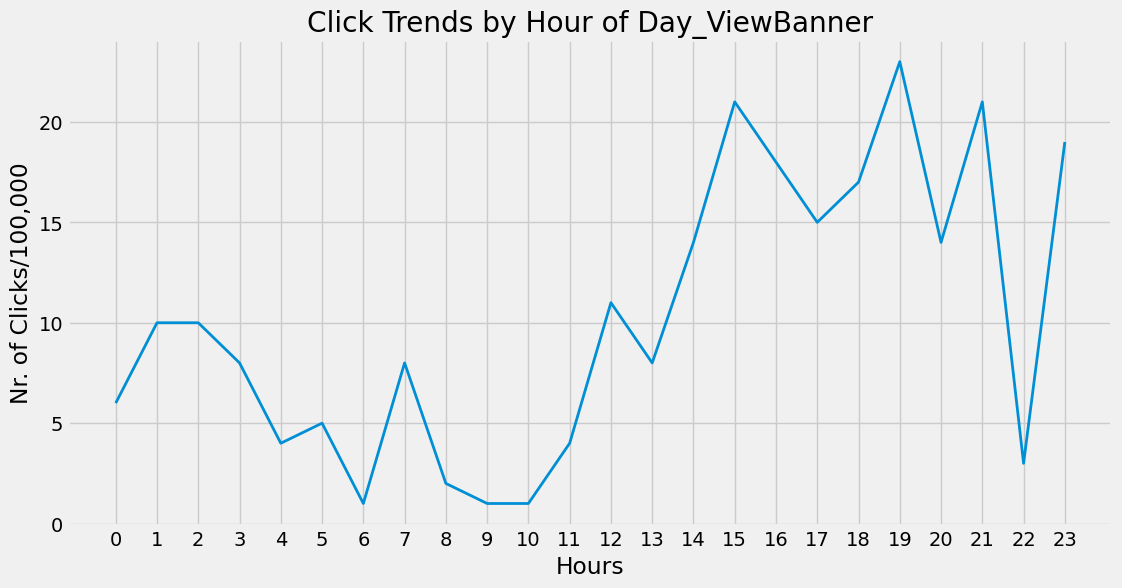

In [202]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0, 24))
plt.plot(df1_ctr['Date_hour'],df1_ctr['Action_Click'], lw=2)
plt.ylabel('Nr. of Clicks/100,000')
plt.xlabel('Hours')
plt.title('Click Trends by Hour of Day_ViewBanner')
plt.show()

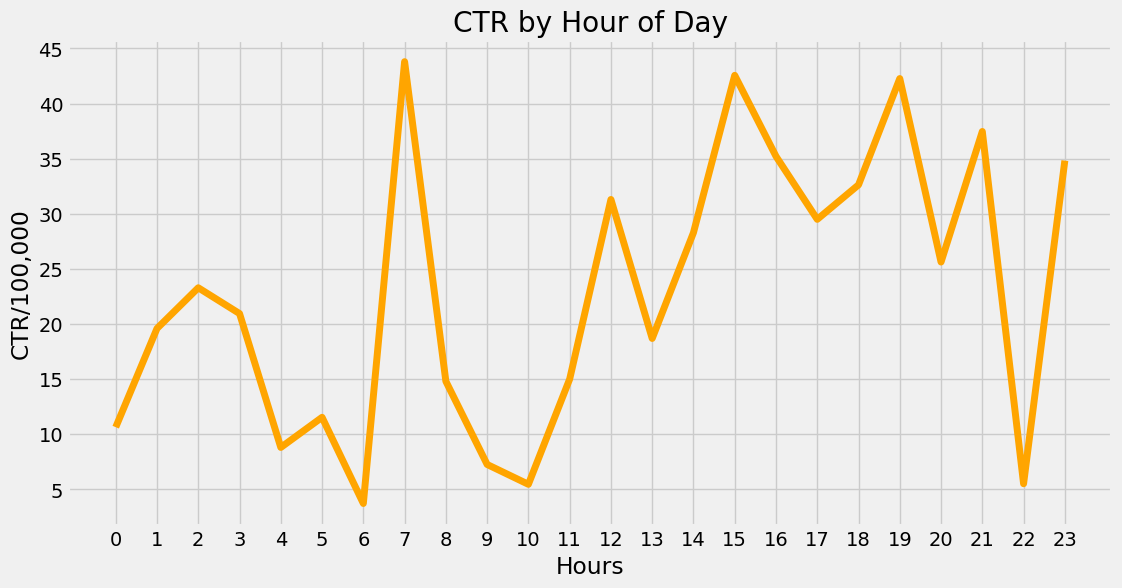

In [206]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0, 24))
plt.plot(df1_ctr['Date_hour'], df1_ctr['CTR'], lw=5, color='orange')
plt.ylabel('CTR/100,000')
plt.xlabel('Hours')
plt.title('CTR by Hour of Day')
plt.show()

# Machine Learning

Apply get dummies on all Categorical varibles

In [311]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1000000 non-null  int64         
 1   ID               1000000 non-null  object        
 2   ActionTime       1000000 non-null  int64         
 3   Website          1000000 non-null  object        
 4   BannerSize       1000000 non-null  object        
 5   Brand            1000000 non-null  object        
 6   colour           1000000 non-null  object        
 7   InteractionTime  1000000 non-null  float64       
 8   Date             1000000 non-null  datetime64[ns]
 9   Date_YMD         1000000 non-null  datetime64[ns]
 10  Date_YM          1000000 non-null  datetime64[ns]
 11  Date_year        1000000 non-null  int64         
 12  Date_month       1000000 non-null  int64         
 13  Date_day         1000000 non-null  int64         
 14  Dat

Note: I'll drop all columns time

In [312]:
X = df1.drop(columns= ['Unnamed: 0', 'ID', 'ActionTime', 'Action_Click', 'Date_YMD', 'Date_YM', 'Date', 'Date_year', 'Date_month', 'Date_day', 'Date_hour', 'Date_Min', 'Date_Second', 'weekday', 'month'])

In [313]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Website          1000000 non-null  object 
 1   BannerSize       1000000 non-null  object 
 2   Brand            1000000 non-null  object 
 3   colour           1000000 non-null  object 
 4   InteractionTime  1000000 non-null  float64
 5   Action_View      1000000 non-null  int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 42.0+ MB


In [ ]:
df1.to_csv('mega.csv')

## Please look at part 3